In [1]:
import numpy as np
import tensorflow as tf
import cv2
from google.cloud import storage
import io
from PIL import Image
import sys, os, inspect
currentdir = os.path.dirname(os.path.abspath(inspect.getfile(inspect.currentframe())))
parentdir = os.path.dirname(currentdir)
sys.path.insert(2,parentdir) 
from model.image_utils import *
sys.path.append('../model')
import image_utils

In [2]:
def get_svhn():
    
    svhn_train = loadmat('../../Datasets/train_32X32.mat') # SVHN train set
    svhn_trainx = svhn_train['X'] # train images
    svhn_trainy = svhn_train['y'] # train labels. We don't need them though.
    
    svhn = []
    
    for img in svhn_trainx.T:
        svhn.append(img.T)
    return svhn

In [3]:
svhn = get_svhn()

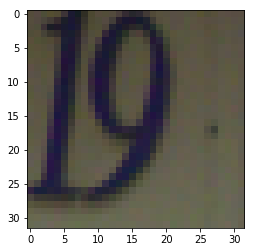

In [4]:
show_1(svhn[1])

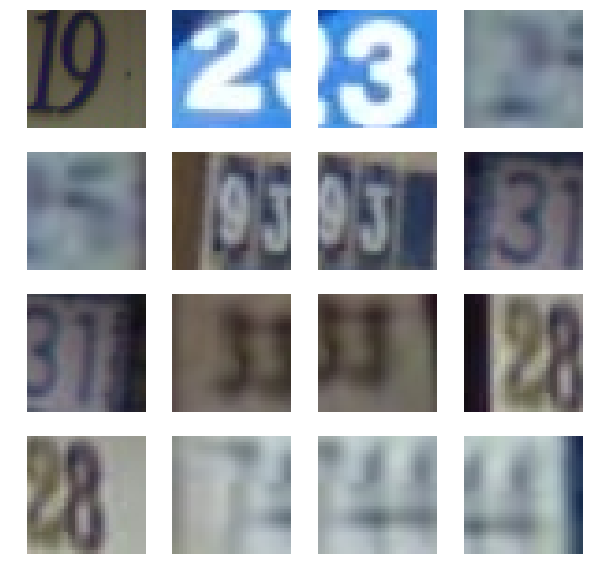

In [5]:
# Lets see our images
ImageCollector.show(None,svhn)

In [6]:
def resize_normal_svhn(svhn):
    
    imgs = []
    for img in svhn:
        resized_img = resize(img)
        if resized_img.shape == (64,64,3):
            imgs.append(resized_img)
        else:
            print('Image reshaped incorrectly')
            pass

    return np.asarray(imgs)

In [7]:
images = resize_normal_svhn(svhn)

In [8]:
## Add noise
images_wnoise = add_noise(images, 1, 5)

In [14]:
# Notebook auto reloads code. (Ref: http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython)
% load_ext autoreload
% autoreload 2
#train the model - generator and discriminator 
from model.dcgan import DCGAN

tf.reset_default_graph()
dcgan = DCGAN(batch_size=64,
              z_dim=100,
              model_name='DCGAN',
              data_source='CelebA',
              z_dist='norm')
dcgan.train(images_wnoise, learning_rate=0.0001, iters=1500)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
conv_0_(64, 4, 4, 512)
conv_0_norm_(64, 4, 4, 512)
conv_0_relu_(64, 4, 4, 512)
conv_1_(64, 8, 8, 256)
conv_1_norm_(64, 8, 8, 256)
conv_1_relu_(64, 8, 8, 256)
conv_2_(64, 16, 16, 128)
conv_2_norm_(64, 16, 16, 128)
conv_2_relu_(64, 16, 16, 128)
conv_3_(64, 32, 32, 64)
conv_3_norm_(64, 32, 32, 64)
conv_3_relu_(64, 32, 32, 64)
conv_4_(64, 64, 64, 3)
(64, 64, 64, 3)
(64, 64, 64, 3)
Building my DCGAN
X_train size 73257
new size 73257
Step: 0, D_loss: 1.4867229461669922, G_loss: 0.4199484586715698
../CelebA/results/0.jpg
Step: 100, D_loss: 1.3250551223754883, G_loss: 1.2319777011871338
../CelebA/results/100.jpg
Step: 200, D_loss: 0.6871594190597534, G_loss: 3.244816303253174
../CelebA/results/200.jpg
Step: 300, D_loss: 0.4722329378128052, G_loss: 2.6863949298858643
../CelebA/results/300.jpg
Step: 400, D_loss: 0.6076759099960327, G_loss: 4.482134819030762
../CelebA/results/400.jpg
Step: 500, D_loss: 0.73564

In [9]:
# show the graph
from model.cnn_jupyter_tensorboard import show_graph 
tf.reset_default_graph()
with tf.Session() as sess:
    saver = tf.train.import_meta_graph('../SVHN/checkpoints/DCGAN.ckpt.meta')
    graph = tf.get_default_graph()
    show_graph(graph)